# SPT3076 스포츠AI개론 학생들을 위한 노트북입니다.

# COCO dataset 탐색

###  Colab 환경 구축

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
print(IN_COLAB)

True


In [ ]:
dataDir='/content/drive/MyDrive/COCOdataset2017/'  # 본인 코랩 노트북 경로 맞추기
dataType='val2017'

In [ ]:
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    import os
    os.chdir(dataDir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 경고 무시
import warnings
warnings.filterwarnings('ignore')
curdir = os.getcwd()
print(curdir)

/content/drive/MyDrive/COCOdataset2017


In [ ]:
!pip install pycocotools scikit-image 

### Import libraries

In [ ]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [ ]:
#dataDir='/content/drive/MyDrive/COCOdataset2017/'
# dataType='val2017'
annFile='{}/instances_{}.json'.format(dataDir,dataType)
print(annFile)

/content/drive/MyDrive/COCOdataset2017//instances_val2017.json


In [ ]:
!pwd

/content/drive/MyDrive/COCOdataset2017


In [ ]:
!ls /content/drive/MyDrive/COCOdataset2017/

COCOdataset_EDA.ipynb  instances_val2017.json  val2017


In [ ]:
# Initialize the COCO api for instance annotations
coco=COCO(annFile)
# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

loading annotations into memory...
Done (t=0.97s)
creating index...
index created!


In [ ]:
cats #  cocodata category id 살펴보기

[{'id': 1, 'name': 'person', 'supercategory': 'person'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 {'id': 17, 'name': 'cat', 'supercategory': 'animal'},
 {'id': 18, 'name': 'dog', 'supercategory': 'animal'},

In [ ]:
# list of categories within sports things
for i in range (len(cats)):
  
    if cats[i]['supercategory'] =='sports' or cats[i]['supercategory'] == 'person':
        print('(id number: ', cats[i]['id'], ') ', cats[i]['name'])
    else:
        continue

(id number:  1 )  person
(id number:  34 )  frisbee
(id number:  35 )  skis
(id number:  36 )  snowboard
(id number:  37 )  sports ball
(id number:  38 )  kite
(id number:  39 )  baseball bat
(id number:  40 )  baseball glove
(id number:  41 )  skateboard
(id number:  42 )  surfboard
(id number:  43 )  tennis racket


In [ ]:
# getting the list of sports category ids
cat_sports = []
for i in range (len(cats)):
    if cats[i]['supercategory'] =='sports' or cats[i]['supercategory'] == 'person':
        cat_sports.append(cats[i]['name'])
    else:
        continue

print(cat_sports)

['person', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket']


In [ ]:
sportsIds = coco.getCatIds(catNms=cat_sports)
print(sportsIds)
print(cat_sports)

[1, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
['person', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket']


In [ ]:
# code to printout the class name
def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"

print('The class name is', getClassName(39, cats))

The class name is baseball bat


## 1. Displaying the image

In [ ]:
for className in cat_sports:
    catIds = coco.getCatIds(catNms=className)
    imgIds = coco.getImgIds(catIds=catIds)
    print("Number of images for", className, ":", len(imgIds))

Number of images for person : 2693
Number of images for frisbee : 84
Number of images for skis : 120
Number of images for snowboard : 49
Number of images for sports ball : 169
Number of images for kite : 91
Number of images for baseball bat : 97
Number of images for baseball glove : 100
Number of images for skateboard : 127
Number of images for surfboard : 149
Number of images for tennis racket : 167


In [ ]:
filterClasses = ['baseball bat'] #type in the class which you want to see
img_no = 4 #3 #type in the order of image which you want to see, 60

In [ ]:
#resetting the image Id for each class
catIds = coco.getCatIds(catNms=filterClasses)
imgIds = coco.getImgIds(catIds=catIds)
imgIds.sort() #sort the image in order

In [ ]:
np.shape(imgIds) # image 개수

(97,)

In [ ]:
catIds # id = 39 : baseball bat

[39]

In [ ]:
len(imgIds)

97

In [ ]:
#imgIds

In [ ]:
img_no

4

In [ ]:
id_no = imgIds[img_no-1]
print(id_no) # 전체에서 id가 몇 번째인지

18491


* Only seeing the specific image chosen (원하는 sports class 중 ’몇 번째’ 순서의 이미지 보기)

In [ ]:
# load image and the total annotation data
img = coco.loadImgs(id_no)[0] ##### insert specific image ID number
print(img)

{'license': 5, 'file_name': '000000018491.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000018491.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-19 17:54:54', 'flickr_url': 'http://farm3.staticflickr.com/2134/5814907667_496ae24446_z.jpg', 'id': 18491}


In [ ]:
img['id']

18491

/content/drive/MyDrive/COCOdataset2017/val2017/000000018491.jpg


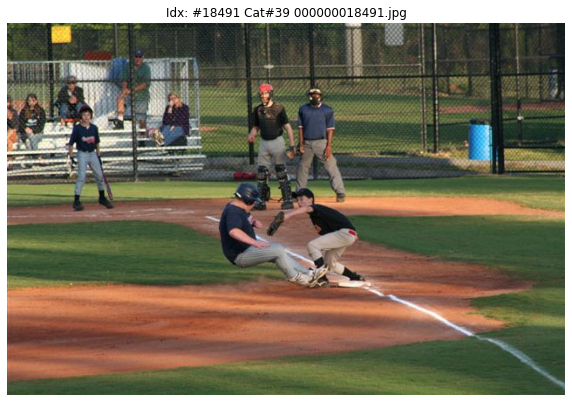

In [ ]:
fn_img = '{}{}/{}'.format(dataDir,dataType,img['file_name'])
print(fn_img)
I = io.imread(fn_img)/255.0 #digital data of an image

fig = plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(I)
title = 'Idx: #{} Cat#{} {}'.format(img['id'], catIds[0], img['file_name'])
plt.title(title)
plt.show()


## 2.  Load the annotations of the Image

In [ ]:
# img['id'] 해당 이미지의 annotions ID 가져오기
annIds = coco.getAnnIds(imgIds=img['id'], catIds=sportsIds, iscrowd=None)
print(annIds)

anns = coco.loadAnns(annIds)
print(anns)

[629357, 634537, 635185, 1235753, 1247297, 1250410, 1266544, 1269631, 1277912, 1280740, 1287702, 1290047, 1307857]
[{'segmentation': [[106.65, 155.46, 113.52, 180.37, 122.32, 202.48, 119.1, 204.41, 117.17, 199.91, 112.23, 181.23, 105.36, 155.25]], 'area': 103.96229999999969, 'iscrowd': 0, 'image_id': 18491, 'bbox': [105.36, 155.25, 16.96, 49.16], 'category_id': 39, 'id': 629357}, {'segmentation': [[313.57, 217.13, 306.97, 225.2, 300.67, 235.76, 298.03, 242.06, 300.08, 244.85, 305.36, 245.29, 311.96, 235.32, 314.75, 231.36, 318.85, 229.3, 319.0, 218.74, 316.21, 216.69]], 'area': 285.53729999999996, 'iscrowd': 0, 'image_id': 18491, 'bbox': [298.03, 216.69, 20.97, 28.6], 'category_id': 40, 'id': 634537}, {'segmentation': [[323.24, 142.51, 331.53, 142.51, 331.68, 146.21, 329.46, 153.31, 328.42, 154.94, 327.54, 157.6, 323.98, 158.34, 320.58, 154.79, 318.95, 151.39, 319.99, 148.57, 322.5, 146.8, 322.8, 143.69]], 'area': 138.23775000000003, 'iscrowd': 0, 'image_id': 18491, 'bbox': [318.95, 14

In [ ]:
print("Number of annotations : ", len(anns))

Number of annotations :  13


In [ ]:
anns[1]['bbox']

[298.03, 216.69, 20.97, 28.6]

In [ ]:
anns[2]['segmentation']

[[323.24,
  142.51,
  331.53,
  142.51,
  331.68,
  146.21,
  329.46,
  153.31,
  328.42,
  154.94,
  327.54,
  157.6,
  323.98,
  158.34,
  320.58,
  154.79,
  318.95,
  151.39,
  319.99,
  148.57,
  322.5,
  146.8,
  322.8,
  143.69]]

In [ ]:
# get the class name of each annotations
a = []
for i in range(len(anns)):
    a.append(getClassName(anns[i]['category_id'], cats))

# Now, filter out the repeated images
unique_a = [] #list of unique values of category annotations
for i in range(len(a)):
    if a[i] not in unique_a:
        unique_a.append(a[i])
        
print(unique_a)    

['baseball bat', 'baseball glove', 'person']


In [ ]:
#print out the number of annotation for each type of categories
for i in unique_a:
    ann_name = coco.getCatIds(catNms=i)
    print("Number of ", i, "(class no.", ann_name[0], ") :", a.count(i))

Number of  baseball bat (class no. 39 ) : 1
Number of  baseball glove (class no. 40 ) : 2
Number of  person (class no. 1 ) : 10


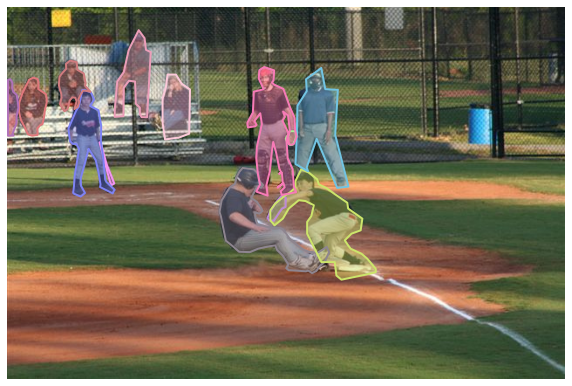

In [ ]:
# Load and display instance annotations of the selected category
fig = plt.figure(figsize=(10,10))#, dpi=150
plt.imshow(I)
plt.axis('off')

coco.showAnns(anns) # COCO 제공 함수를 이용하여 그려보기

## 3. View the bbox of the sports annotations

The bbox value (x,y,w,h) for baseball bat (id.629357) : 
 [105.36, 155.25, 16.96, 49.16]
The bbox value (x,y,w,h) for baseball glove (id.634537) : 
 [298.03, 216.69, 20.97, 28.6]
The bbox value (x,y,w,h) for baseball glove (id.635185) : 
 [318.95, 142.51, 12.73, 15.83]
The bbox value (x,y,w,h) for person (id.1235753) : 
 [243.01, 184.65, 125.8, 120.6]
The bbox value (x,y,w,h) for person (id.1247297) : 
 [301.3, 186.15, 120.9, 126.66]
The bbox value (x,y,w,h) for person (id.1250410) : 
 [330.11, 69.96, 60.81, 137.59]
The bbox value (x,y,w,h) for person (id.1266544) : 
 [274.91, 68.91, 56.59, 147.5]
The bbox value (x,y,w,h) for person (id.1269631) : 
 [177.68, 77.51, 31.52, 74.51]
The bbox value (x,y,w,h) for person (id.1277912) : 
 [69.7, 95.37, 53.1, 122.1]
The bbox value (x,y,w,h) for person (id.1280740) : 
 [58.77, 61.57, 36.28, 58.18]
The bbox value (x,y,w,h) for person (id.1287702) : 
 [122.79, 26.65, 41.35, 99.82]
The bbox value (x,y,w,h) for person (id.1290047) : 
 [13.04, 81.09,

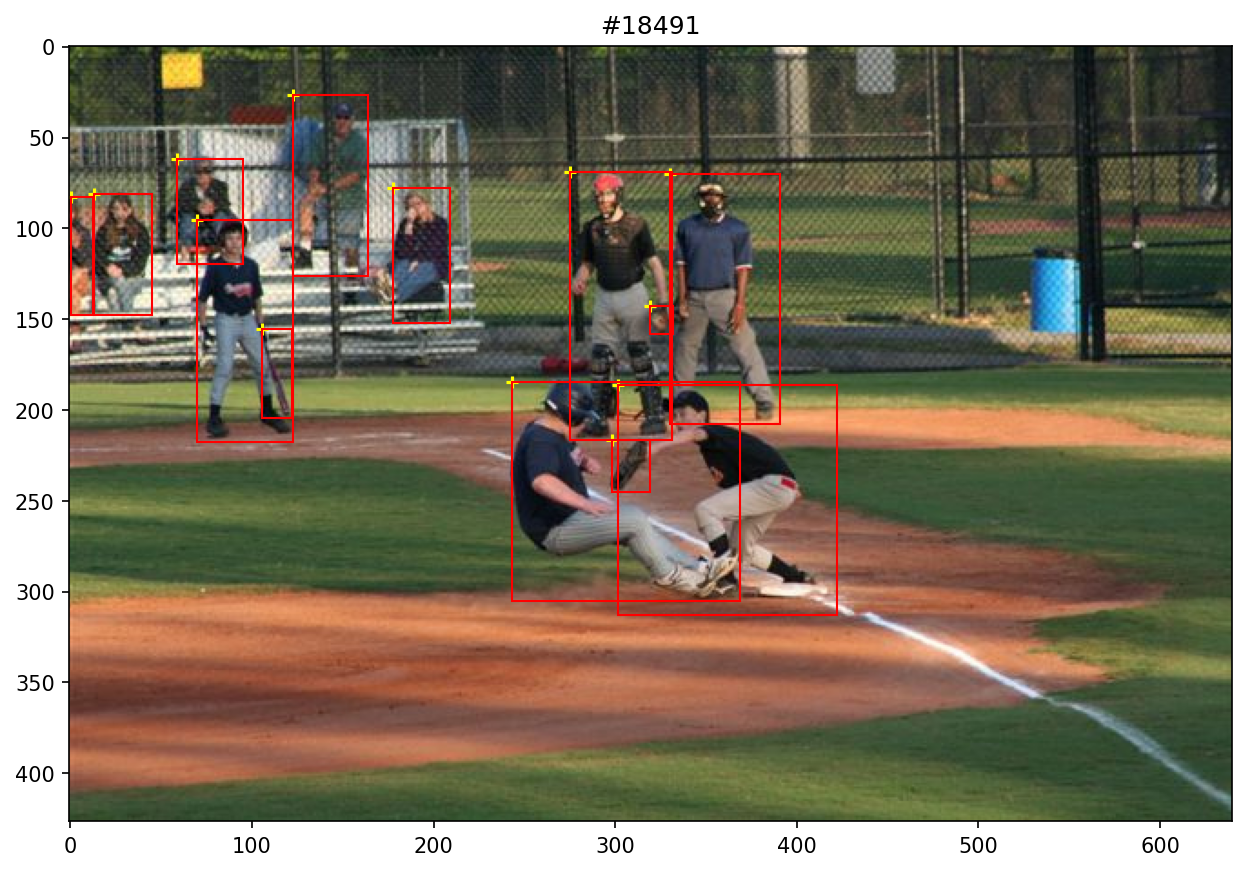

In [ ]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10,10), dpi=150)

# Display the image
plt.imshow(I)
plt.axis()

for i in range(len(anns)): #
    print("The bbox value (x,y,w,h) for {} (id.{})".format(getClassName(anns[i]['category_id'], cats),anns[i]['id']),
          ": \n", anns[i]['bbox'])
    [x,y,w,h] = anns[i]['bbox']
    
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.scatter(x,y, marker='+',c='yellow')
    
plt.title('#{}'.format(img['id']))    
plt.show()


## 4. View the masks/segmentation of the sports annotations

The area of the baseball bat (id.629357)  mask : 103.96
The area of the baseball glove (id.634537)  mask : 285.54
The area of the baseball glove (id.635185)  mask : 138.24
The area of the person (id.1235753)  mask : 5264.41
The area of the person (id.1247297)  mask : 5928.67
The area of the person (id.1250410)  mask : 4403.25
The area of the person (id.1266544)  mask : 4446.74
The area of the person (id.1269631)  mask : 1959.64
The area of the person (id.1277912)  mask : 2735.71
The area of the person (id.1280740)  mask : 1137.31
The area of the person (id.1287702)  mask : 2216.29
The area of the person (id.1290047)  mask : 1449.07
The area of the person (id.1307857)  mask : 550.33


Text(0.5, 1.0, 'Mask of #18491')

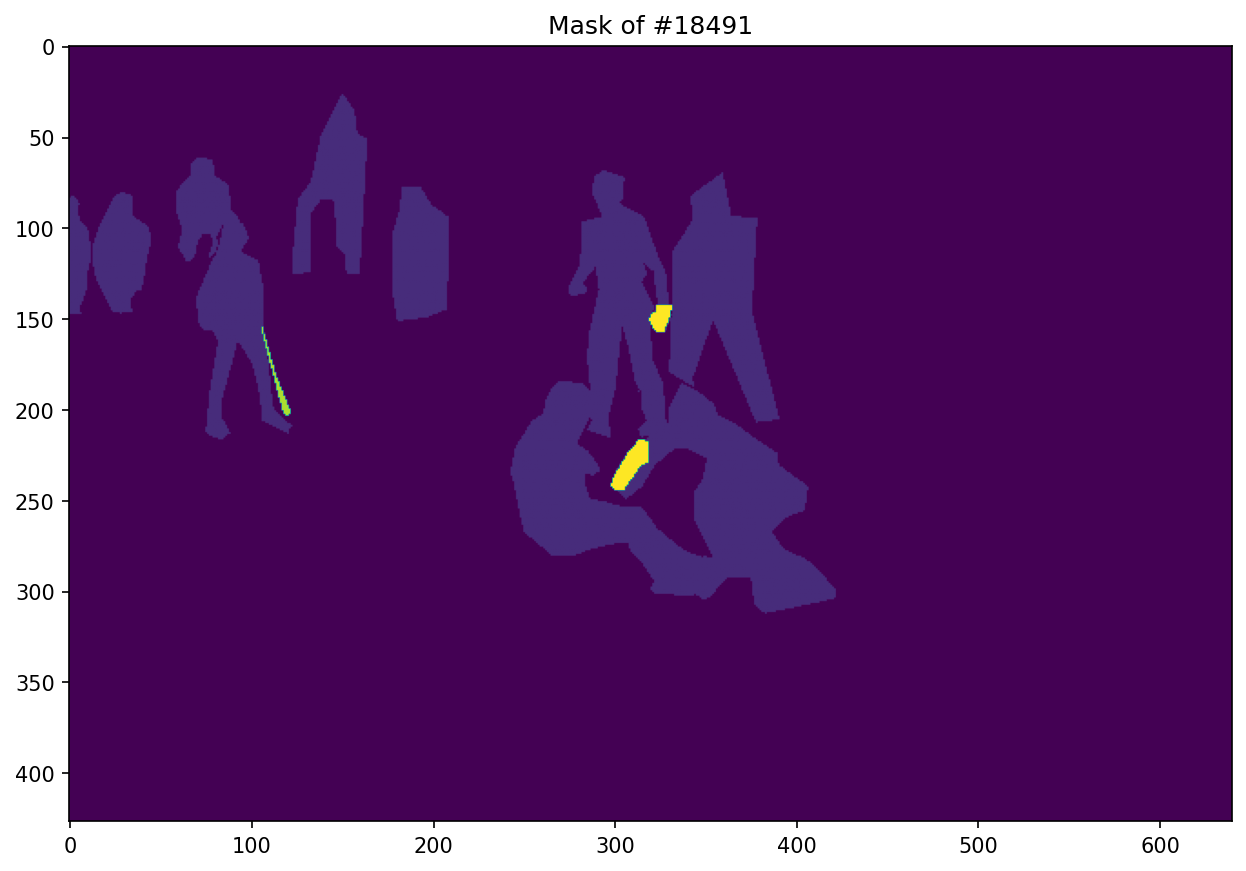

In [ ]:
#### GENERATE A SEGMENTATION MASK ####
fig, ax = plt.subplots(figsize=(10,10), dpi=150)
mask = np.zeros((img['height'],img['width']))

for i in range(len(anns)):
    print("The area of the {} (id.{})".format(getClassName(anns[i]['category_id'], cats),anns[i]['id']),
          " mask :", round(anns[i]['area'],2))
    
    className = getClassName(anns[i]['category_id'], cats)
#     print(className)
    # index value of the specific class + 1
    pixel_value = cat_sports.index(className)+1
#     print(pixel_value)
    # pixel_value allows no overlap of each masks
    mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
#     print(mask)
plt.imshow(mask)
plt.title('Mask of #{}'.format(img['id']))

## 5. Plotting the segmentation area

In [ ]:
len(anns[0]['segmentation'][0]) //2

7

In [ ]:
X = anns[0]['segmentation'][0][::2]   # 0 부터 2씩 ->짝수
Y = anns[0]['segmentation'][0][1::2]  # 1부터 2씩 -> 홀수

X = np.array(X)
Y = np.array(Y)

In [ ]:
X = np.hstack( (X, X[0])) #close-loop
Y = np.hstack( (Y, Y[0]))

In [ ]:
print(X)
print(Y)

[106.65 113.52 122.32 119.1  117.17 112.23 105.36 106.65]
[155.46 180.37 202.48 204.41 199.91 181.23 155.25 155.46]


(104.512, 123.16799999999999, -206.868, -152.792)

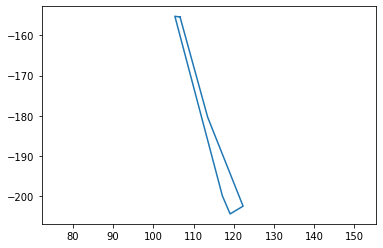

In [ ]:
# plt.plot(X, Y)
plt.plot(X, -Y) # X 축 대칭이니 Y에 마이너스(-)
plt.axis('equal')

In [ ]:
for i in range(len(anns)):
    a = getClassName(anns[i]['category_id'], cats)
    #for data that has more than one segmentation set
    b=0
    for j in range(len(anns[i]['segmentation'])):
        b = b+len(anns[i]['segmentation'][j])
        print("Number of segmentation points (x,y) of", a, "(annotation id.{})".format(anns[i]['id']), ") :", int(b/2))

Number of segmentation points (x,y) of baseball bat (annotation id.629357) ) : 7
Number of segmentation points (x,y) of baseball glove (annotation id.634537) ) : 11
Number of segmentation points (x,y) of baseball glove (annotation id.635185) ) : 12
Number of segmentation points (x,y) of person (annotation id.1235753) ) : 57
Number of segmentation points (x,y) of person (annotation id.1247297) ) : 40
Number of segmentation points (x,y) of person (annotation id.1250410) ) : 14
Number of segmentation points (x,y) of person (annotation id.1266544) ) : 59
Number of segmentation points (x,y) of person (annotation id.1269631) ) : 11
Number of segmentation points (x,y) of person (annotation id.1277912) ) : 36
Number of segmentation points (x,y) of person (annotation id.1280740) ) : 32
Number of segmentation points (x,y) of person (annotation id.1287702) ) : 19
Number of segmentation points (x,y) of person (annotation id.1290047) ) : 26
Number of segmentation points (x,y) of person (annotation 

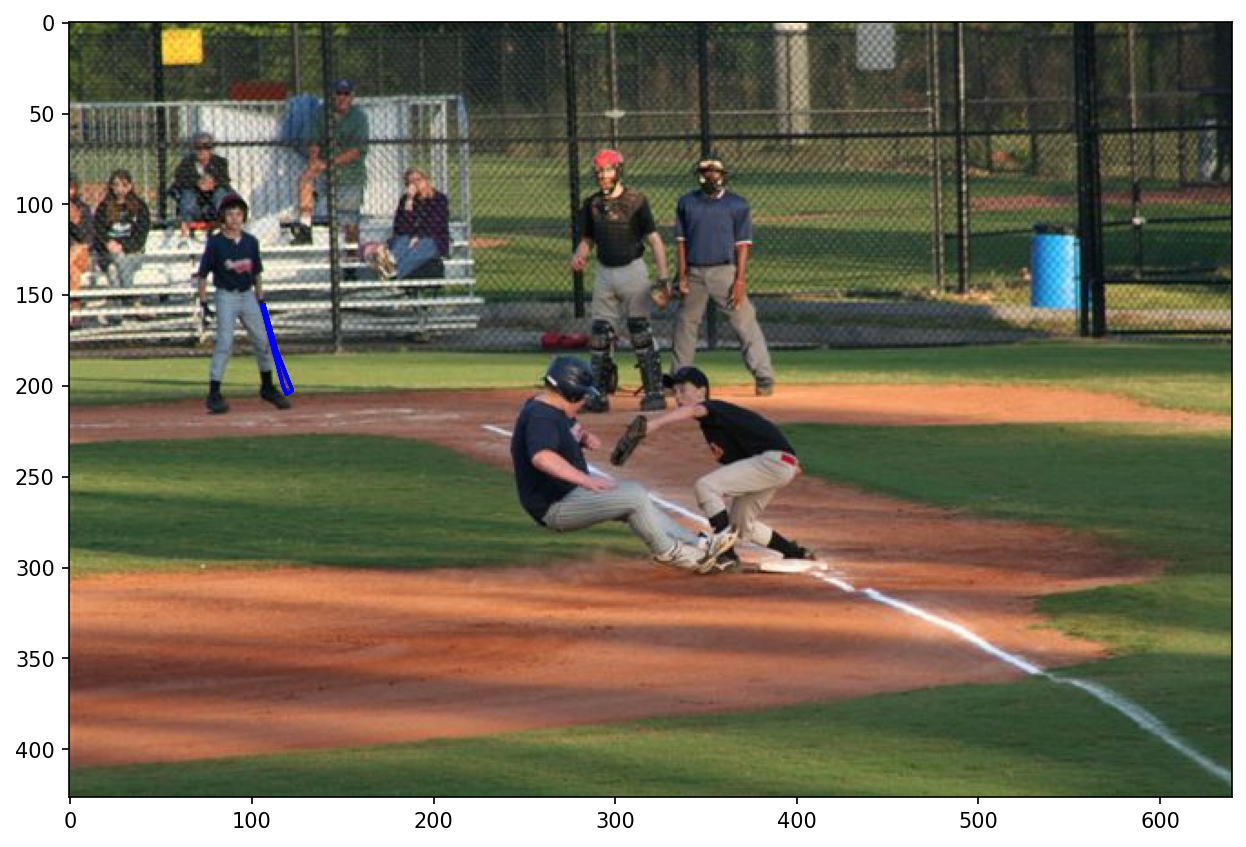

In [ ]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10,10), dpi=150)

# Display the image
plt.imshow(I)
plt.axis()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'black', 'gray', 'purple', 'orange', 'skyblue']
for i in range(len(anns)):
    plt.plot(X, Y, color = colors[0]) #plt.plot(X, Y, color = colors[i]) 제일 마지막 색으로 돌아감

## 6. Drawing bbox and mask

In [ ]:
[x,y,w,h] = anns[0]['bbox']
print([x,y,w,h])

[105.36, 155.25, 16.96, 49.16]


[{'segmentation': [[106.65, 155.46, 113.52, 180.37, 122.32, 202.48, 119.1, 204.41, 117.17, 199.91, 112.23, 181.23, 105.36, 155.25]], 'area': 103.96229999999969, 'iscrowd': 0, 'image_id': 18491, 'bbox': [105.36, 155.25, 16.96, 49.16], 'category_id': 39, 'id': 629357}, {'segmentation': [[313.57, 217.13, 306.97, 225.2, 300.67, 235.76, 298.03, 242.06, 300.08, 244.85, 305.36, 245.29, 311.96, 235.32, 314.75, 231.36, 318.85, 229.3, 319.0, 218.74, 316.21, 216.69]], 'area': 285.53729999999996, 'iscrowd': 0, 'image_id': 18491, 'bbox': [298.03, 216.69, 20.97, 28.6], 'category_id': 40, 'id': 634537}, {'segmentation': [[323.24, 142.51, 331.53, 142.51, 331.68, 146.21, 329.46, 153.31, 328.42, 154.94, 327.54, 157.6, 323.98, 158.34, 320.58, 154.79, 318.95, 151.39, 319.99, 148.57, 322.5, 146.8, 322.8, 143.69]], 'area': 138.23775000000003, 'iscrowd': 0, 'image_id': 18491, 'bbox': [318.95, 142.51, 12.73, 15.83], 'category_id': 40, 'id': 635185}, {'segmentation': [[347.98, 280.81, 354.39, 282.41, 361.2, 27

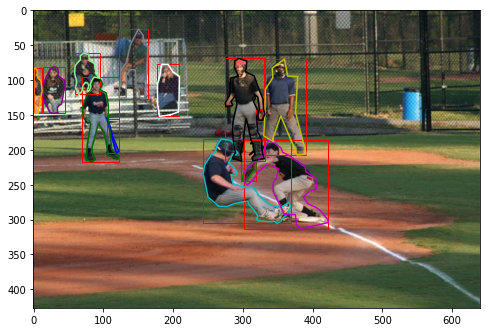

In [ ]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(8,8)) #dpi=150

# Display the image
plt.imshow(I)
plt.axis()

print(anns)

colors = colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'darkgreen', 'lightgreen', 'gray', 'purple', 'orange', 'skyblue'] # 지정된 색의 개수보다 bounding box의 개수가 더 많을 경우 오류날 수 있음!

for i in range(len(anns)):
    print("The bbox value for {} (id.{})".format(getClassName(anns[i]['category_id'], cats),anns[i]['id']), ":",anns[i]['bbox'])
    [x,y,w,h] = anns[i]['bbox']
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    for t in range(len(anns[i]['segmentation'])):
        #making empty list for verifying x and y axis
        xs =[]
        ys =[]
        for j in range(len(anns[i]['segmentation'][t])):
            if j%2 == 0:
                xs.append(anns[i]['segmentation'][t][j])
            else:
                ys.append(anns[i]['segmentation'][t][j])
        #repeat the first point to create a 'closed loop'
        xs.append(xs[0])
        ys.append(ys[0])
        
        plt.plot(xs, ys, color = colors[i])
#         plt.scatter(xs, ys, color=colors[i-1])
    print("Color of the {} (id.{})".format(getClassName(anns[i]['category_id'],cats), anns[i]['id']), ":", colors[i], "\n")
    
plt.show()
